# Put four qubits into Greenberger-Horne-Zeilinger (GHZ) State \
### (1/sqrt(2))[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]

In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram, array_to_latex, plot_bloch_multivector
from math import pi
%matplotlib inline

/tmp/ipykernel_8901/2125300435.py:7: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  circuit.cnot(0,1)
/tmp/ipykernel_8901/2125300435.py:8: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  circuit.cnot(0,2)
/tmp/ipykernel_8901/2125300435.py:9: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  circuit.cnot(0,3)
/home/duke/braket/braket/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The def

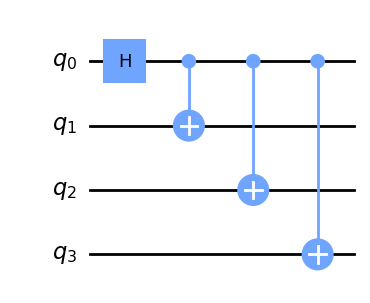

In [10]:
circuit = QuantumCircuit(4)  # circuit with four qubits
circuit.h(0)
#circuit.cnot(0,1)
#circuit.cnot(1,2)
#circuit.cnot(2,3)
##### OR THIS WORKS ######
circuit.cnot(0,1)
circuit.cnot(0,2)
circuit.cnot(0,3)
###########
circuit.draw(output='mpl')

In [11]:
simulator = Aer.get_backend('statevector_simulator')  # create simulator returning state vector of qubit
result = execute(circuit, backend = simulator).result()  # only single shot needed
statevector = result.get_statevector()
array_to_latex(statevector, prefix="\\text{statevector = }\n") 

<IPython.core.display.Latex object>

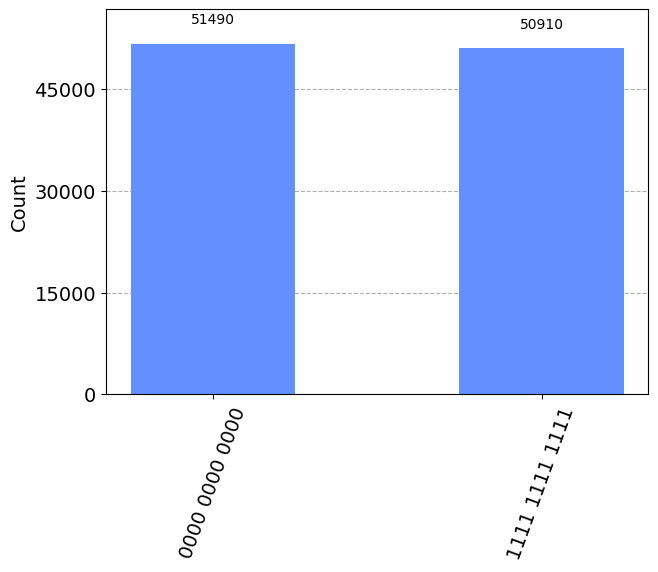

In [14]:
circuit.measure_all()
simulator = Aer.get_backend('qasm_simulator')  # create simulator
result = execute(circuit, backend = simulator, shots = 102400).result()  # execute simulator 1024 times
plot_histogram(result.get_counts())  #plot counts of all executions